<h1><center>Enterprise Analytics</center></h1>
<h2><center>Group Project - US Accident Prediction - AutoML Section</center></h2>


# Import libraries and Set up H2O

Install H2O for python in a terminal window. Install dependencies first. 

In [49]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install scikit-learn

Install the latest version of h2o python module

In [48]:
pip install http://h2o-release.s3.amazonaws.com/h2o/rel-tibshirani/8/Python/h2o-3.6.0.8-py2.py3-none-any.whl

Note: you may need to restart the kernel to use updated packages.


Import necessary libraries

In [29]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

Initialize H2O in python 

In [25]:
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O cluster uptime:,58 mins 41 secs
H2O cluster timezone:,America/Toronto
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_å°�ä¸�_iz9mbs
H2O cluster total nodes:,1
H2O cluster free memory:,3.505 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


# Upload data

For the AutoML regression model, we use the dataset after preprocessing. The main objective of this section is to predict accident duration based on other numeric values in US accident dataset. We assume that severtiy level can be obtained as soon as accdient happens. Duration prediction plays an important role in accident managment process. With such prediction information, the government is able to mitigate traffic congestion due to accidents in a more proactive way. We adopted AutoML model to predict duration of future accidents. 

In [31]:
# load data into H2O
df = h2o.import_file(r'D:\US-Accidents\df.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


Let's get a sense of data.

In [32]:
df.describe()

Rows:487804
Cols:45




,C1,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Day,Start_Hour,Accident_Duration
type,int,int,real,real,real,real,real,string,enum,enum,enum,enum,enum,enum,real,real,int,real,real,enum,real,real,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,int
mins,0.0,1.0,24.5574,-124.49742,0.0,-124.497419,0.0,NaN,,,,,,,-40.0,-65.9,1.0,0.12,0.0,,0.0,0.0,,,,,,,,,,,,,,,,,,,2016.0,1.0,1.0,0.0,302.0
mean,249966.22514985493,2.359244696640454,36.49620611018356,-95.48087961271533,9.189136159359084,-24.452923120031834,0.1501315915327046,NaN,,,,,,,62.36198678157624,52.98101204582165,65.42030815655461,29.831290805323427,9.150269780485603,,8.127075423735768,0.006742421136358044,,,,,,,,,,,,,,,,,,,2017.8038289968922,7.066746070142923,15.69333789800821,12.10507498913497,5510.462040081667
maxs,499999.0,4.0,48.994,-67.606864,49.00076,0.0,151.80854366970476,NaN,,,,,,,170.6,115.0,100.0,33.04,111.0,,703.1,10.05,,,,,,,,,,,,,,,,,,,2019.0,12.0,31.0,23.0,86396.0
sigma,144355.3087520344,0.5417799002462939,4.935364247695628,17.21869815361463,16.34565338573105,43.947350123693596,0.9004153669450531,NaN,,,,,,,18.77897289152535,15.731524256712657,22.53362826897772,0.7184085298082538,2.8908384290001203,,4.700990956874471,0.12955936104240542,,,,,,,,,,,,,,,,,,,1.0377139792268606,3.4564745069103595,8.72691949585327,5.093328738970474,6804.171383324198
zeros,1,0,0,0,368565,368565,392909,0,,,,,,,120,55,0,0,138,,22945,454402,,,,,,,,,,,,,,,,,,,0,0,0,3859,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,3.0,42.493706,-83.515755,0.0,0.0,0.0,Right hand shoulder blocked and right lane blocked due to accident on I-96 Eastbound at Exit 160 Beck Rd.,I-96 W,R,Novi,Oakland,MI,US/Eastern,49.0,44.0,64.0,28.81,10.0,NNW,12.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019.0,5.0,13.0,17.0,4482.0
1,1.0,2.0,40.67436,-111.872936,40.67433,-111.869894,0.15982683452243684,Between US-89/S State St and Salt Lake City - Accident.,E 4500 S,L,Salt Lake City,Salt Lake,UT,US/Mountain,43.7,39.7,64.0,29.92,10.0,WNW,6.9,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2017.0,10.0,1.0,22.0,21600.0
2,2.0,2.0,25.682124,-80.38884,25.682124,-80.38884,0.0,At SR-94/Kendall Dr/Exit 20 - Accident.,Florida's Tpke N,R,Miami,Miami-Dade,FL,US/Eastern,73.9,54.0,85.0,30.25,10.0,ESE,10.4,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2018.0,2.0,20.0,6.0,1800.0


Here we only keep numerical features are predictors, and take accident duration as the response column. 

In [36]:
#abstract all the numerical values as predictors
print(df.columns)
df_num = df[['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)','Accident_Duration' ]]

['C1', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Timezone', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Start_Year', 'Start_Month', 'Start_Day', 'Start_Hour', 'Accident_Duration']


Lastly, we split the data into two dataframes, training and testing datasets, which takes 80% and 20% of full data set perspectively. Testing dataset will be utilized to evaluate the leaderboard and generate predictions using AutoML model.

In [51]:
y = 'Accident_Duration'
splits = df_num.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# AutoML modeling

'max_runtime_secs' limits the running time of AutoML modeling, here we run AutoML after 600 seconds, since our dataset is huge. We use test set metrics instead of cross validation to generate the leaderboard. 

In [52]:
aml = H2OAutoML(max_runtime_secs = 600, seed = 1, project_name = 'test_pred_severity')
aml.train(y=y, training_frame = train, leaderboard_frame = test)


AutoML progress: |█
14:21:19.366: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


To futher demonstrate AutoML model, we aslo excute AutoML run with the full dataset (without passing a leaderboard frame). This time leaderboard will apply cross-validation metrics instread of test-set metrics

In [56]:
aml2 = H2OAutoML (max_runtime_secs = 600, seed = 1, project_name = 'full_pred_serverity')
aml2.train(y = y, training_frame = df_num)

AutoML progress: |█
14:37:40.616: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


# Leaderboard

Leaderboard will store a default performance metric for every ML task. AutoML leaderboard applies the performance of prediction mse to rank the models. 

In [53]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20200215_142119,1.4257e+07,3775.84,1.4257e+07,1861.74,0.548496
StackedEnsemble_AllModels_AutoML_20200215_142119,1.42599e+07,3776.23,1.42599e+07,1858.56,0.548451
DRF_1_AutoML_20200215_142119,1.42657e+07,3777,1.42657e+07,1875.56,0.549418
GBM_4_AutoML_20200215_142119,1.47204e+07,3836.72,1.47204e+07,1911.31,nan
GBM_5_AutoML_20200215_142119,1.48238e+07,3850.17,1.48238e+07,1937.6,0.556157
GBM_3_AutoML_20200215_142119,1.50716e+07,3882.21,1.50716e+07,1952.02,nan
GBM_2_AutoML_20200215_142119,1.51526e+07,3892.63,1.51526e+07,1962.33,nan
GBM_1_AutoML_20200215_142119,1.52407e+07,3903.93,1.52407e+07,1981.85,nan
GLM_1_AutoML_20200215_142119,4.61379e+07,6792.49,4.61379e+07,4828.78,0.977033


As the table above indicates, the two stacked ensembles rank at the top of the leaderboard. Stacked Ensembles ourperform other single models.

In [57]:
aml2.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20200215_143740,1.42042e+07,3768.84,1.42042e+07,1872.31,0.549644
StackedEnsemble_AllModels_AutoML_20200215_143740,1.42042e+07,3768.85,1.42042e+07,1872.31,0.549644
DRF_1_AutoML_20200215_143740,1.42074e+07,3769.26,1.42074e+07,1885.41,0.55013
GBM_3_AutoML_20200215_143740,1.49291e+07,3863.82,1.49291e+07,1961.34,nan
GBM_4_AutoML_20200215_143740,1.50094e+07,3874.2,1.50094e+07,2031.43,nan
GBM_2_AutoML_20200215_143740,1.50625e+07,3881.04,1.50625e+07,1976,nan
GBM_1_AutoML_20200215_143740,1.51916e+07,3897.64,1.51916e+07,1994.86,nan
GLM_1_AutoML_20200215_143740,4.62962e+07,6804.13,4.62962e+07,4842.13,0.977175


# Prediction 

After building up the model, we can generate predictions of accident duration based on testing dataset or the leader model project. 

In [55]:
prediction = aml.predict(test)
prediction.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
12785.8
2382.43
2456.47
2002.59
2021.97
4052.37
2504.54
2205.72
1949.29
2294.41


Generate an H2O model performance object using model_performance() function. 

In [58]:
performance = aml.leader.model_performance(test)
performance 


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 14257002.063233616
RMSE: 3775.844549664832
MAE: 1861.7421094087822
RMSLE: 0.5484959041366745
R^2: 0.6909910160873297
Mean Residual Deviance: 14257002.063233616
Null degrees of freedom: 97363
Residual degrees of freedom: 97361
Null deviance: 4492249890483.234
Residual deviance: 1388118748884.6777
AIC: 1880168.7424015864


# Visualization

In [59]:
# get ids of all Automl models
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

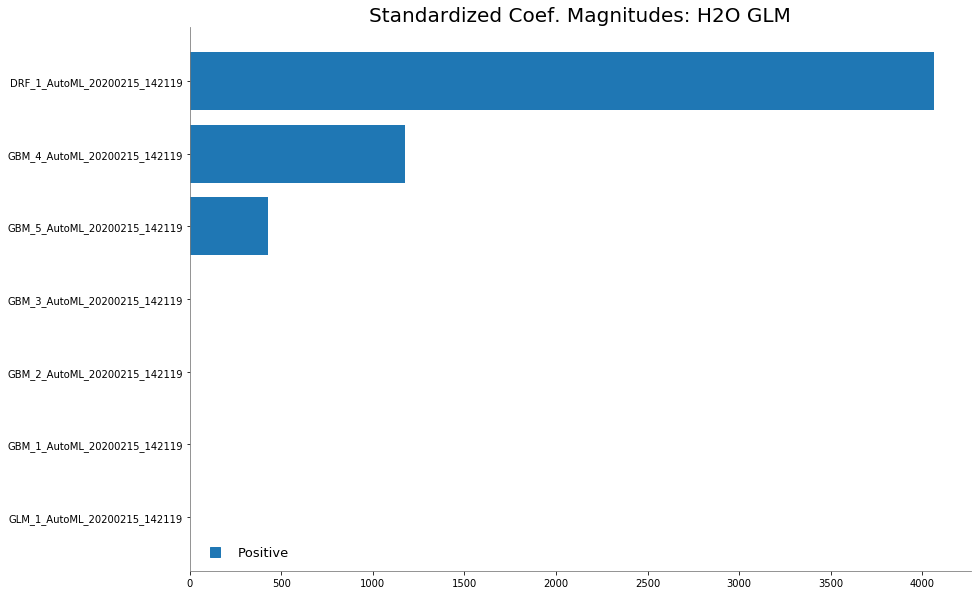

In [60]:
# plot
%matplotlib inline
metalearner.std_coef_plot()